## Boston Housing Data

In [1]:
from sklearn.datasets import load_boston 

In [2]:
boston = load_boston()

In [3]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
#print boston['DESCR']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
housing_data=pd.DataFrame(boston['data'],columns=boston['feature_names'])

In [7]:
housing_price=pd.DataFrame(boston['target'],columns=['price'])

In [8]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
housing_price.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [10]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [12]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## EDA

Text(0,0.5,u'Crime')

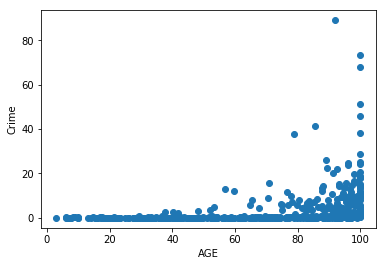

In [13]:
plt.scatter(housing_data['AGE'],housing_data['CRIM'])
plt.xlabel('AGE')
plt.ylabel('Crime')

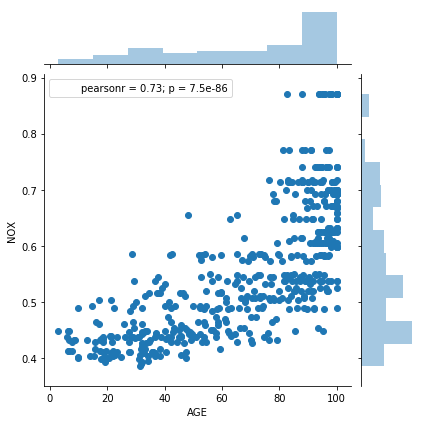

In [14]:
sns.jointplot('AGE','NOX',housing_data)

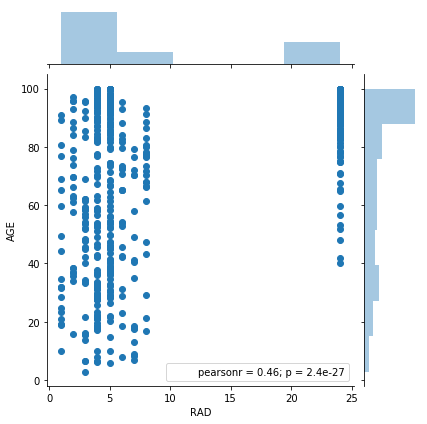

In [15]:
#sns.jointplot('RAD','CRIM',housing_data)
sns.jointplot('RAD','AGE',housing_data)

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(housing_data,housing_price,test_size=0.3,random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate

In [21]:
model.coef_

array([[ -8.74917163e-02,   5.02793747e-02,   2.06785359e-02,
          3.75457604e+00,  -1.77933846e+01,   3.24118660e+00,
          1.20902568e-02,  -1.40965453e+00,   2.63476633e-01,
         -1.03376395e-02,  -9.52633123e-01,   6.20783942e-03,
         -5.97955998e-01]])

In [22]:
cf=pd.DataFrame(model.coef_.reshape(13,1),index=housing_data.columns,columns=['Coeff'])
cf

,Coeff
CRIM,-0.087492
ZN,0.050279
INDUS,0.020679
CHAS,3.754576
NOX,-17.793385
RM,3.241187
AGE,0.012090
DIS,-1.409655
RAD,0.263477
TAX,-0.010338


In [23]:
pred=model.predict(x_test)

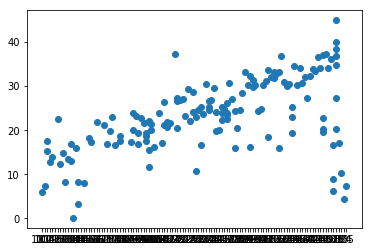

In [24]:
plt.scatter(y_test,pred)

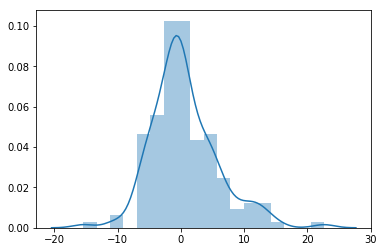

In [25]:
sns.distplot((y_test-pred))

In [26]:
from sklearn import metrics 

In [27]:
print 'MAE:',metrics.mean_absolute_error(y_test,pred)
print 'MSE:',metrics.mean_squared_error(y_test,pred)
print 'RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred))

MAE: 3.83652813773
MSE: 28.5511487657
RMSE: 5.34332749938
